In [1]:
#Load libraries
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import norm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
%matplotlib inline

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Use only important features
columns = ['custid','card2spent','cardspent', 'carditems', 'card2items','lninc', 'creddebt', 
         'card', 'age', 'debtinc', 'card2']

In [3]:
cust_spend = pd.read_excel('spend prediction.xlsx', usecols=columns)

In [4]:
cust_spend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   custid      5000 non-null   object 
 1   age         5000 non-null   int64  
 2   lninc       5000 non-null   float64
 3   debtinc     5000 non-null   float64
 4   creddebt    5000 non-null   float64
 5   card        5000 non-null   int64  
 6   card2       5000 non-null   int64  
 7   carditems   5000 non-null   int64  
 8   cardspent   5000 non-null   float64
 9   card2items  5000 non-null   int64  
 10  card2spent  5000 non-null   float64
dtypes: float64(5), int64(5), object(1)
memory usage: 429.8+ KB


In [5]:
cust_spend.head()

,custid,age,lninc,debtinc,creddebt,card,card2,carditems,cardspent,card2items,card2spent
0,3964-QJWTRG-NPN,20,3.43,11.1,1.20,3,5,5,81.66,4,67.80
1,0648-AIPJSP-UVM,22,2.71,18.6,1.22,2,4,5,42.60,2,34.94
2,5195-TLUDJE-HVO,67,3.56,9.9,0.93,2,4,9,184.22,7,175.75
3,4459-VLPQUH-3OL,23,3.00,5.7,0.02,2,3,17,340.99,1,18.42
4,8158-SMTQFB-CNO,26,3.14,1.7,0.21,4,1,8,255.10,7,252.73


In [6]:
cust_spend['totalspend'] = cust_spend['cardspent'] + cust_spend['card2spent']

In [7]:
cust_spend.drop(["cardspent","card2spent","custid"],axis=1, inplace=True)

In [8]:
cust_spend.head()

,age,lninc,debtinc,creddebt,card,card2,carditems,card2items,totalspend
0,20,3.43,11.1,1.20,3,5,5,4,149.46
1,22,2.71,18.6,1.22,2,4,5,2,77.54
2,67,3.56,9.9,0.93,2,4,9,7,359.97
3,23,3.00,5.7,0.02,2,3,17,1,359.41
4,26,3.14,1.7,0.21,4,1,8,7,507.83


In [9]:
cust_spend.describe()

,age,lninc,debtinc,creddebt,card,card2,carditems,card2items,totalspend
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.00000
mean,47.025600,3.699840,9.954160,1.857364,2.714200,2.774400,10.17740,4.666600,498.07863
std,17.770338,0.746945,6.399783,3.415789,1.184905,1.173448,3.39114,2.497017,351.52927
min,18.000000,2.200000,0.000000,0.000000,1.000000,1.000000,0.00000,0.000000,8.11000
25%,31.000000,3.180000,5.100000,0.390000,2.000000,2.000000,8.00000,3.000000,276.28250
50%,47.000000,3.640000,8.800000,0.930000,3.000000,3.000000,10.00000,5.000000,414.25000
75%,62.000000,4.200000,13.600000,2.060000,4.000000,4.000000,12.00000,6.000000,615.56250
max,79.000000,6.980000,43.100000,109.070000,5.000000,5.000000,23.00000,15.000000,4881.05000


In [10]:
features = ["age", 'lninc', 'debtinc', 'creddebt',
            'card', 'card2','carditems', 'card2items']

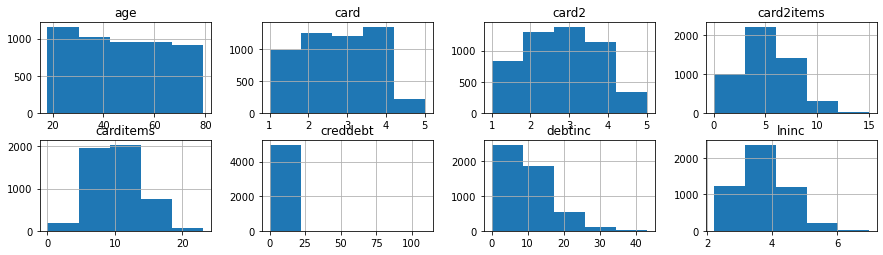

In [11]:
cust_spend[features].hist(bins=5, figsize=(15, 6), layout=(3, 4));

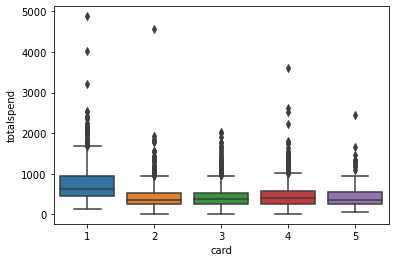

In [12]:
ax = sns.boxplot(x="card", y="totalspend", data=cust_spend)

In [13]:
cust_spend.corr()

,age,lninc,debtinc,creddebt,card,card2,carditems,card2items,totalspend
age,1.000000,0.144098,0.039084,0.119619,0.009268,-0.006956,-0.026027,-0.009108,0.030848
lninc,0.144098,1.000000,0.014029,0.489324,0.021011,-0.079283,0.070439,0.079427,0.388889
debtinc,0.039084,0.014029,1.000000,0.368393,0.006421,-0.010058,0.008085,0.008482,0.017176
creddebt,0.119619,0.489324,0.368393,1.000000,0.020665,-0.038943,0.017041,0.038839,0.265115
card,0.009268,0.021011,0.006421,0.020665,1.000000,-0.379440,-0.029148,-0.104419,-0.243304
card2,-0.006956,-0.079283,-0.010058,-0.038943,-0.379440,1.000000,-0.014372,-0.027859,-0.060812
carditems,-0.026027,0.070439,0.008085,0.017041,-0.029148,-0.014372,1.000000,0.095623,0.391936
card2items,-0.009108,0.079427,0.008482,0.038839,-0.104419,-0.027859,0.095623,1.000000,0.403740
totalspend,0.030848,0.388889,0.017176,0.265115,-0.243304,-0.060812,0.391936,0.403740,1.000000


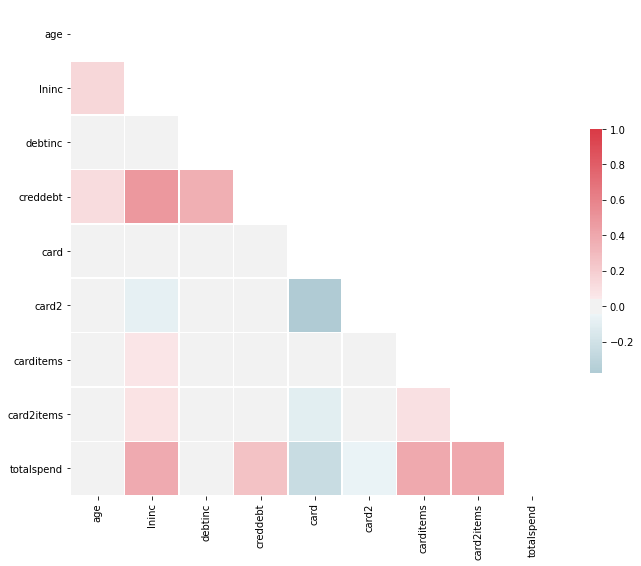

In [14]:
# Compute the correlation matrix
corr = cust_spend.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

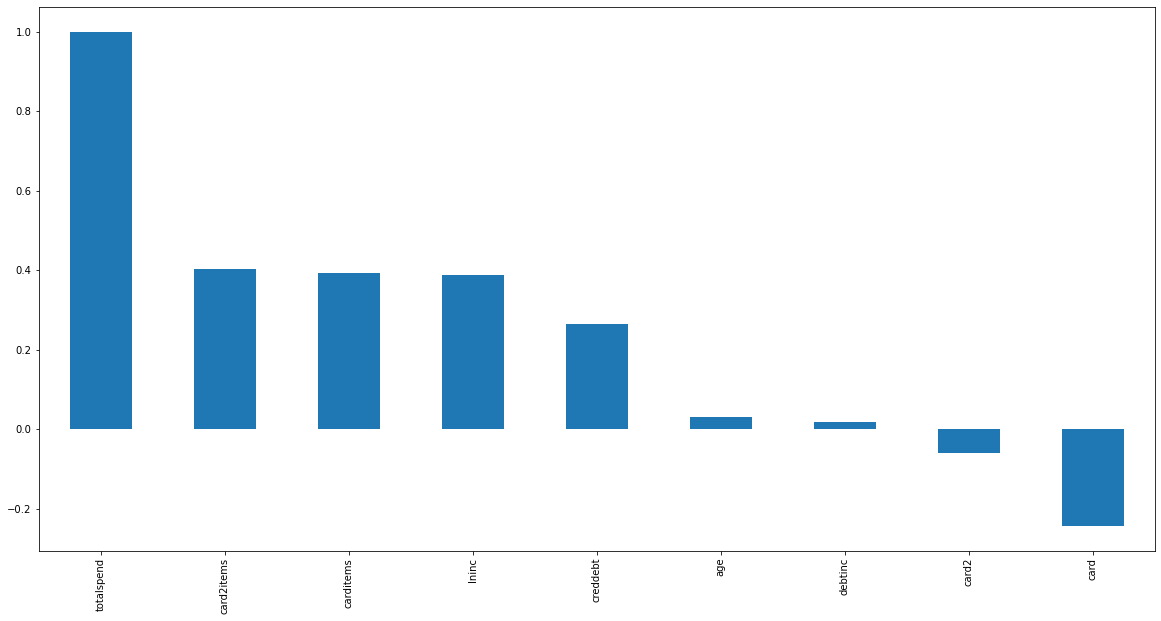

In [15]:
plt.figure(figsize=(20,10))
cust_spend.corr()['totalspend'].sort_values(ascending = False).plot(kind='bar');

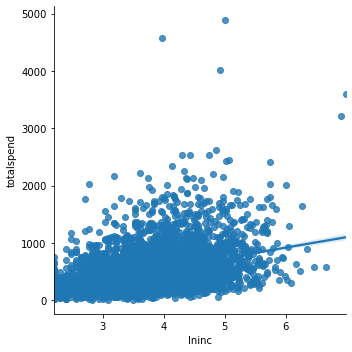

In [16]:
sns.lmplot(x='lninc', y='totalspend', data=cust_spend);

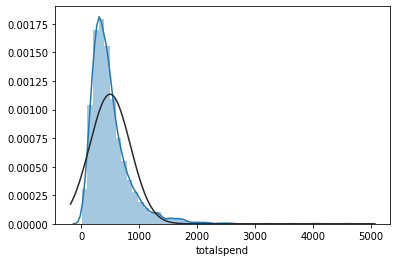

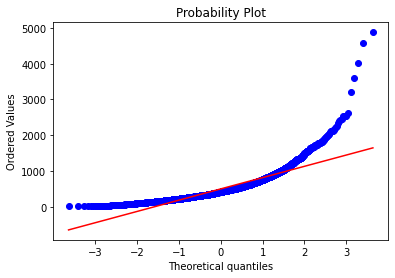

In [18]:
sns.distplot(cust_spend['totalspend'], fit=norm);
fig = plt.figure()
res = stats.probplot(cust_spend['totalspend'], plot=plt)

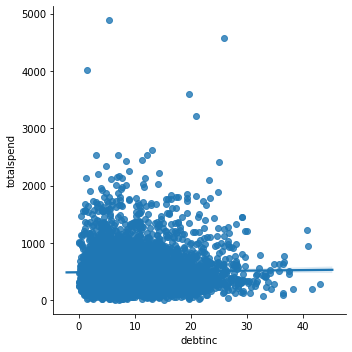

In [19]:
sns.lmplot(x='debtinc', y='totalspend', data=cust_spend);

In [20]:
cust_spend.head()

,age,lninc,debtinc,creddebt,card,card2,carditems,card2items,totalspend
0,20,3.43,11.1,1.20,3,5,5,4,149.46
1,22,2.71,18.6,1.22,2,4,5,2,77.54
2,67,3.56,9.9,0.93,2,4,9,7,359.97
3,23,3.00,5.7,0.02,2,3,17,1,359.41
4,26,3.14,1.7,0.21,4,1,8,7,507.83


In [68]:
X = cust_spend.drop(['totalspend'], axis=1)
y = cust_spend['totalspend']

In [69]:
#train test split: 75% train set and 25% test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# summarize split
print('Train data rows = %d, columns = %d' % (X_train.shape[0], X_train.shape[1]))
print('Test data rows = %d, columns = %d' % (X_test.shape[0], X_test.shape[1]))

Train data rows = 3750, columns = 8
Test data rows = 1250, columns = 8


In [36]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators =90, max_depth = 10, random_state = 432)
rf.fit(X_train, Y_train)

print("Train R-Squared:",rf.score(X_train, Y_train))
print("Test R-Squared:", rf.score(X_test, Y_test))

Train R-Squared: 0.8297416676591284
Test R-Squared: 0.5286376831875921


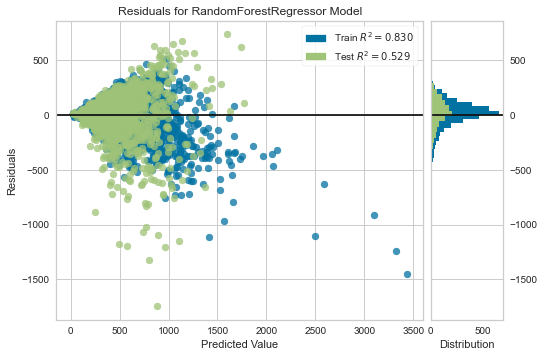

In [37]:
visualizer = ResidualsPlot(rf)

visualizer.fit(X_train, Y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, Y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

In [38]:
#Grid search cv for XGBoost
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
import datetime
from sklearn.model_selection import GridSearchCV

# Various hyper-parameters to tune
xgb1 = XGBRegressor()
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:squarederror'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 2,
                        n_jobs = 5,
                        verbose=True)

xgb_grid.fit(X_train,
         Y_train)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

Fitting 2 folds for each of 9 candidates, totalling 18 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  18 out of  18 | elapsed:    7.6s finished


[13:55:50] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


0.4485178575940809
{'colsample_bytree': 0.7, 'learning_rate': 0.03, 'max_depth': 5, 'min_child_weight': 4, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:squarederror', 'silent': 1, 'subsample': 0.7}


In [39]:
# Import XGBoost and convert the train and test set into a DMatrix
import xgboost
d_train = xgboost.DMatrix(X_train, label=Y_train)
d_test = xgboost.DMatrix(X_test, label=Y_test)

# watchlist is used for early stopping
watchlist = [(d_train, 'train'), (d_test, 'eval')]

# Parameter Tuning from grid search above
params = {
    "learning_rate": 0.03,                      
    "objective": "reg:squarederror",         # regression
    "subsample": 0.7, 
    "base_score": np.mean(Y_train),
    "max_depth": 5,
    "min_child_weight": 4,
    "reg_alpha": 0.1,
    "eval_metric": "rmse"                    # stop training based on rmse
}

# Train the model
model = xgboost.train(params,                   # set the parameters from above
                      d_train,                  # training data
                      5000,                     # create a maximum of 5,000 iterations
                      evals = watchlist,        # watchlist for early stopping
                      verbose_eval=10,          # display iteration progress on both train and test sets after 10 iterations
                      early_stopping_rounds=100 # early stopping after 100 iterations
                     )

[0]	train-rmse:351.67505	eval-rmse:330.90503
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 100 rounds.
[10]	train-rmse:312.67841	eval-rmse:295.89008
[20]	train-rmse:285.02267	eval-rmse:272.21567
[30]	train-rmse:265.12952	eval-rmse:256.74176
[40]	train-rmse:250.23181	eval-rmse:246.70837
[50]	train-rmse:239.35301	eval-rmse:240.45026
[60]	train-rmse:231.45607	eval-rmse:236.29411
[70]	train-rmse:225.40700	eval-rmse:233.64308
[80]	train-rmse:220.73514	eval-rmse:232.41701
[90]	train-rmse:216.91028	eval-rmse:231.66196
[100]	train-rmse:213.08334	eval-rmse:231.09061
[110]	train-rmse:210.48801	eval-rmse:230.71039
[120]	train-rmse:208.07079	eval-rmse:230.75972
[130]	train-rmse:205.45859	eval-rmse:231.03137
[140]	train-rmse:203.78375	eval-rmse:230.98618
[150]	train-rmse:202.30559	eval-rmse:230.63715
[160]	train-rmse:200.53938	eval-rmse:230.54277
[170]	train-rmse:199.11861	eval-rmse:230.65976
[180]	train-rmse:197.

In [40]:
import sklearn
#Make predictions based on best iteration from early stopping above
ypred = model.predict(d_test, ntree_limit=model.best_ntree_limit)
# Show performance metrics on test set
print("R-Squared on Evaluation Set:", sklearn.metrics.r2_score(Y_test, ypred))
print("Mean Squared Error on Evaluation Set:", sklearn.metrics.mean_squared_error(Y_test, ypred))
print("Root Mean Squared Error on Evaluation Set:", sklearn.metrics.mean_squared_error(Y_test, ypred, squared=False))
print("Mean Absolute Error on Evaluation Set:", sklearn.metrics.mean_absolute_error(Y_test, ypred))

R-Squared on Evaluation Set: 0.5272260062049339
Mean Squared Error on Evaluation Set: 53147.865646096245
Root Mean Squared Error on Evaluation Set: 230.53820864684502
Mean Absolute Error on Evaluation Set: 149.63074040234372


# Interpretability

A useful visualization is a single decision which illustrates how the decision tree model arrived at a decision. The figure below depicts a single decision tree from the trained XGBoost model. This shows the features and feature values for each split as well as the output leaf nodes.

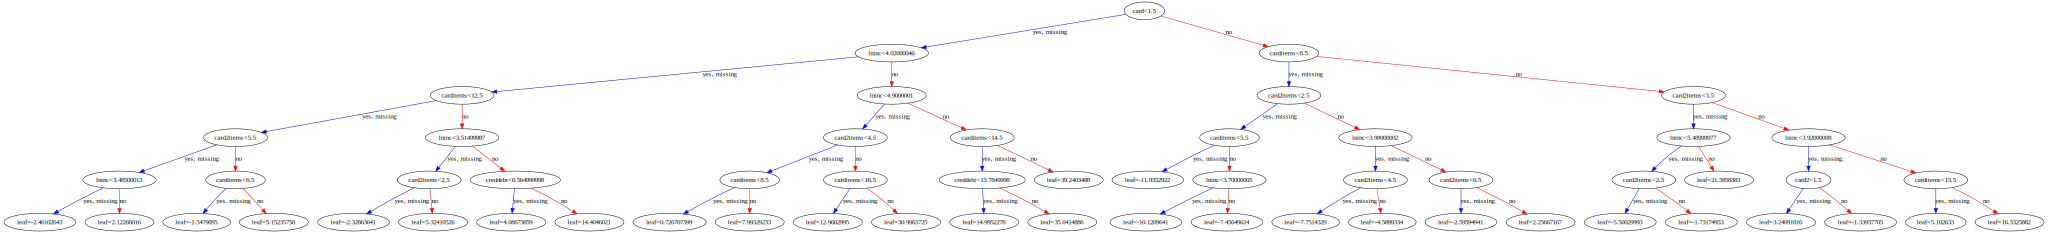

In [41]:
#Plot a single decision tree from trained XGBoost model.
xgboost.to_graphviz(model, num_trees=1)

XGBoost has three default methods of measuring feature importance. These are weight, cover, and gain. Weight is the number of times a feature is used to split the data across all trees. Cover is the average coverage of splits which use the feature where coverage is defined as the number of samples affected by the split. Lastly, gain is the average loss reduction gain of splits which use the feature. As shown in the figure below, the importance attributed to each feature can differ depending on the method used. Shapley values, which are discussed next, often provide more accurate and consistent results.

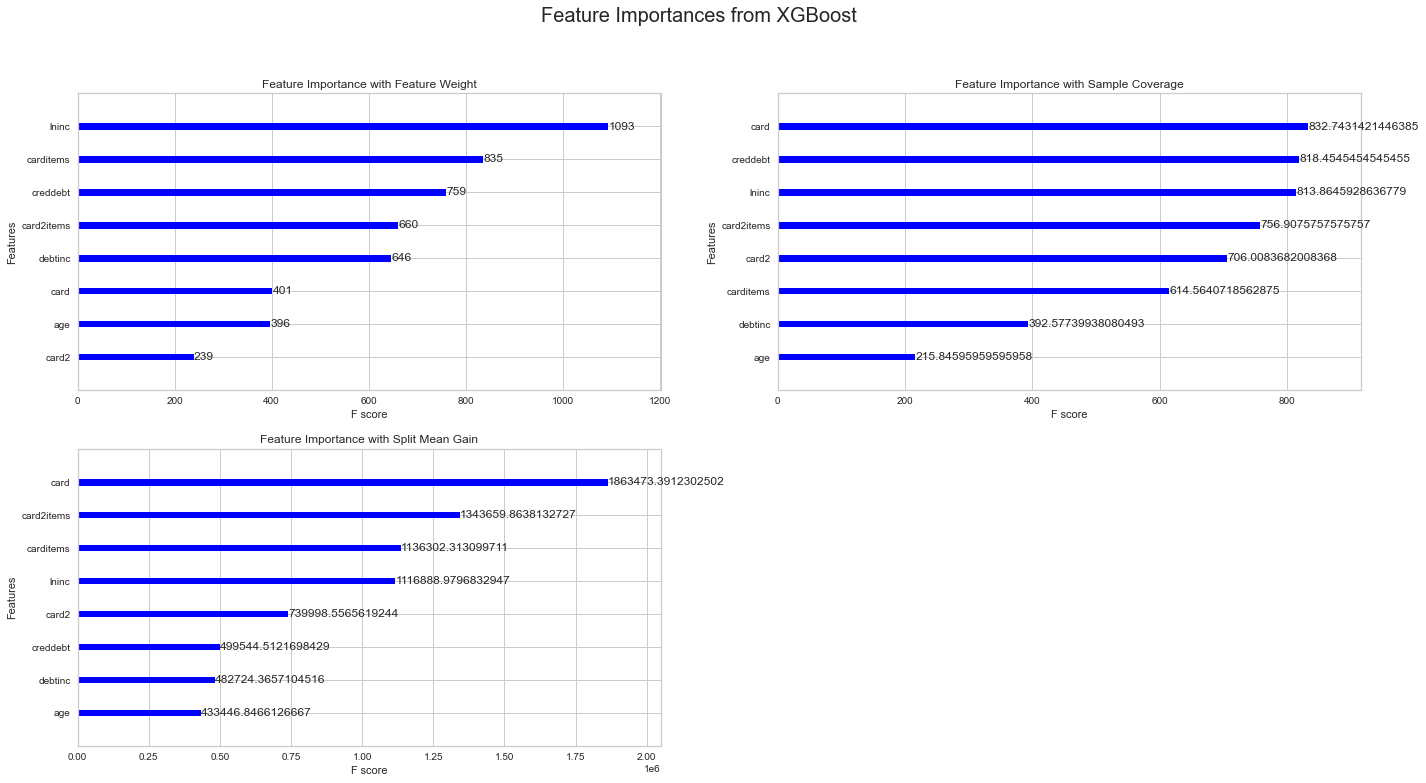

In [42]:
# Ploting XGBoost default feature importances
fig = plt.figure(figsize = (23, 12))
title = fig.suptitle("Feature Importances from XGBoost", fontsize=20)

ax1 = fig.add_subplot(2, 2, 1)
xgboost.plot_importance(model, importance_type='weight', ax=ax1, color='blue')
ax1.set_title("Feature Importance with Feature Weight");

ax2 = fig.add_subplot(2, 2, 2)
xgboost.plot_importance(model, importance_type='cover', ax=ax2, color='blue')
ax2.set_title("Feature Importance with Sample Coverage");

ax3 = fig.add_subplot(2, 2, 3)
xgboost.plot_importance(model, importance_type='gain', ax=ax3, color='blue')
ax3.set_title("Feature Importance with Split Mean Gain");

Shapley values originates from game theory and seeks to fairly distribute payout amongst participants in a coalition. Shapley values are the marginal average contribution of a feature value across all possible coalitions. They are model agnostic and provide both accurate local and global explanations.

In [31]:
import shap

In [44]:
explainer = shap.TreeExplainer(model)

In [45]:
shap_values = explainer.shap_values(X_train)

In [46]:
# load JS visualization code to notebook
shap.initjs()

The bar chart below shows the average of the SHAP value magnitudes across the training dataset. The most important features are income and items on primary and secondary credit cards.

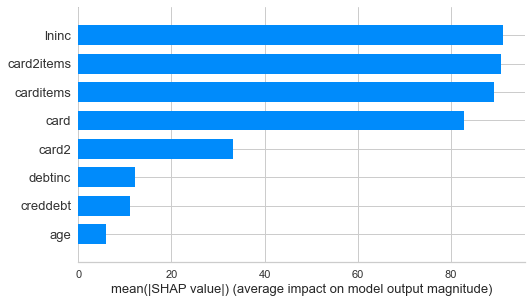

In [47]:
shap.summary_plot(shap_values, X_train, plot_type="bar")

While we have identified which features are important, we have yet to understand the specific direction (positive or negative) that a feature value has on the impact of a prediction. The density scatter plot of SHAP values shown below ranks each feature by importance, and also illustrates the impact that a feature value (indicated by color) has on the model's prediction. The color indicates the feature value (red is high and blue is low). 

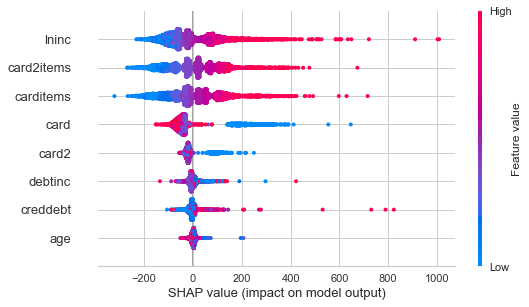

In [48]:
shap.summary_plot(shap_values, X_train)

SHAP dependence plots show the effect of a feature value on the model's output for every sample in the training set. This is similar to partial dependence plots, except it displays interaction effects and doesn't make projections beyond the input space. The figures below show the SHAP dependence plot for every feature. 

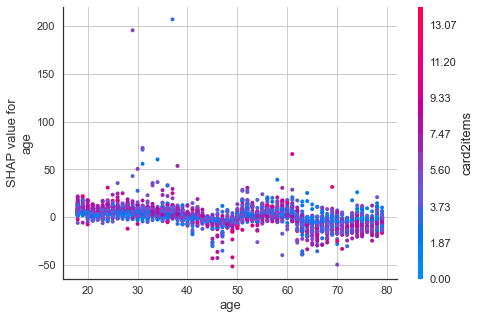

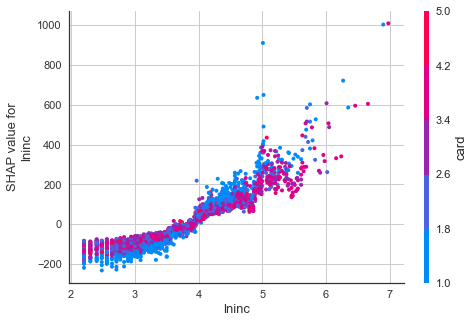

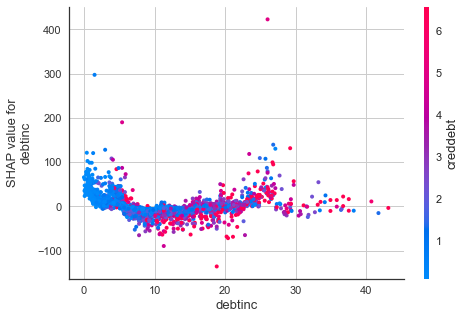

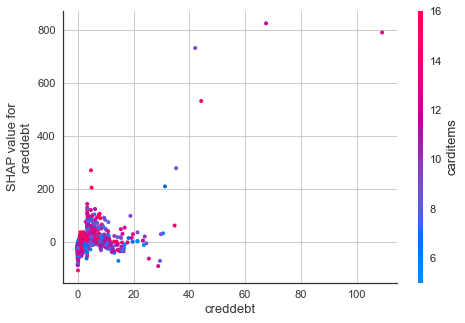

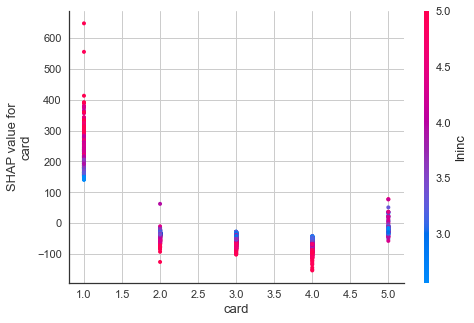

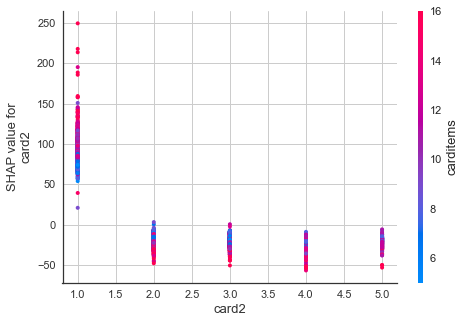

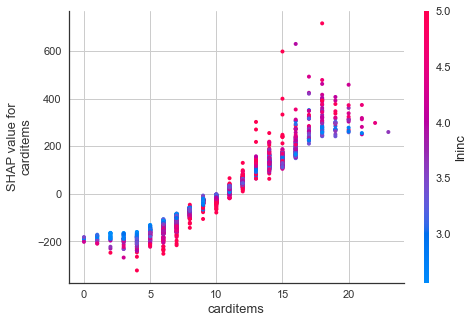

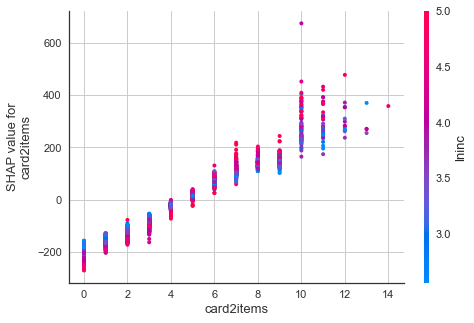

In [49]:
for name in X_train.columns:
    shap.dependence_plot(name, shap_values, X_train)

The SHAPELY values are interpreted as follows:

age- SHAP values reveal that this variable does not have a negative impact on the model for ages less than 60 but as the age crosses 60 it starts to affect the prediction more negatively than positive. This seems mostly due to the card2items with a SHAP value of more than 3.73 when inspected visually.

lninc- It is interesting to see that variance is low when SHAP value is close to 0 and lninc value is around 4. Apart from that it shows good amount of variance at other points on the graph.

debtinc- SHAP value for debtinc varies highly for the debtinc values between 0 and 10, majority of these points have a low value of creddebt too. Data points with debtinc value ranging between 10 and 20 exhibit lower variance in the SHAP value and of them having lower SHAP value for creddebt.

creddebt- Most of the points are clustered between SHAP value range of 0 and 200 and a high variance of SHAP value is observed where creddebt approximately ranges between 0 and 8.

card- SHAP value when number of cards is equal to 1 varies highly with a range of about 500 and most of the points have a high lninc SHAP value whereas the range for other number of card does not exceed 200.

card2- SHAP values range from around 25 to 250 when the card2 value is equal to 1 and SHAP values for other card2 values range around 50-60. Most of the values have a high SHAP value for carditems.

carditems- SHAP values look like they represent a logistic curve with SHAP value for lninc mostly above 3.5 and range of SHAP value for carditems between 13 and 18 is high.

card2items- SHAP values for card2items with values 10 and 11 vary highly compared to other values and also have high values. Most of the lninc values are higher than 3.5 for card2items with value greater than or equal to 6.

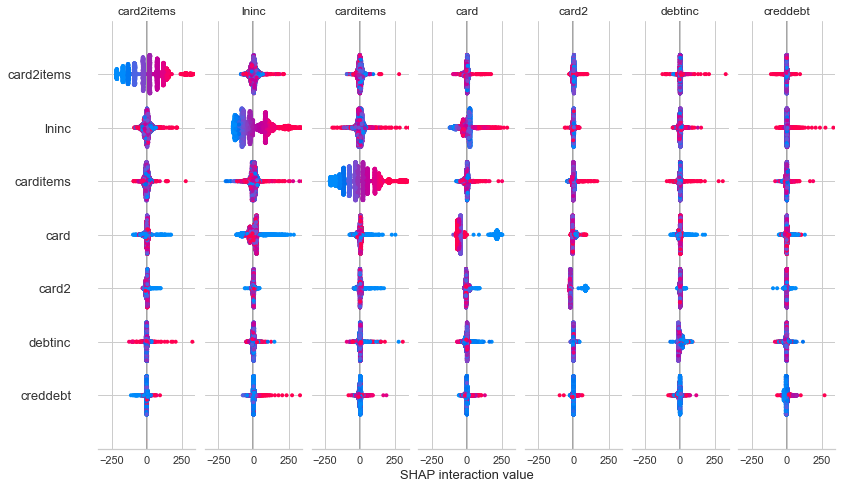

In [52]:
shap.summary_plot(shap_interaction_values, X)